In [28]:
#libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('mall-customers-data.csv')
df.head(12)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#null count in data and dublicate count

null_count=df.isnull().sum()
print(null_count)

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64
Dublicate: 0


In [22]:
# Cleaning Dataset
df.drop_duplicates(inplace=True)
print('Remaining Duplicates:', df.duplicated().sum())


Remaining Duplicates: 0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1000x700 with 0 Axes>

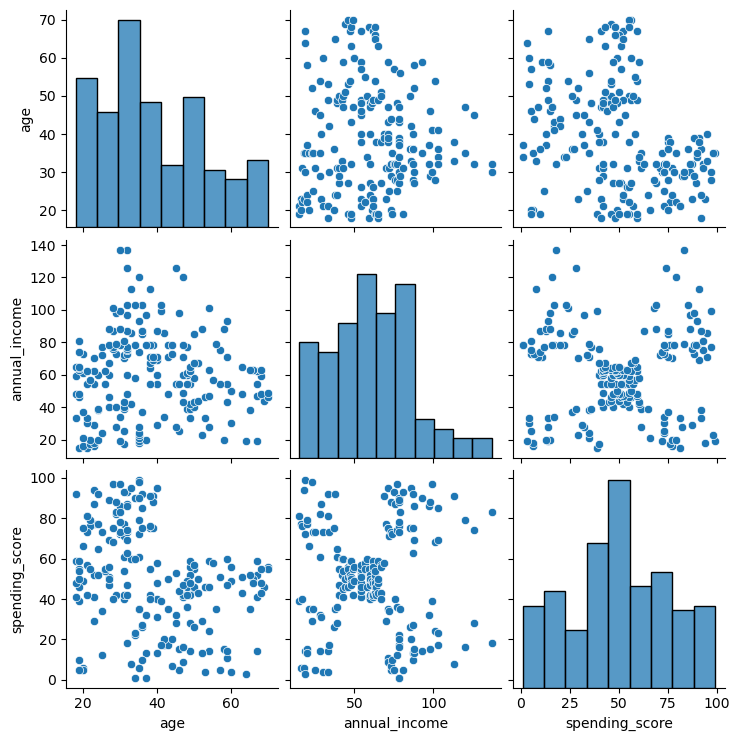

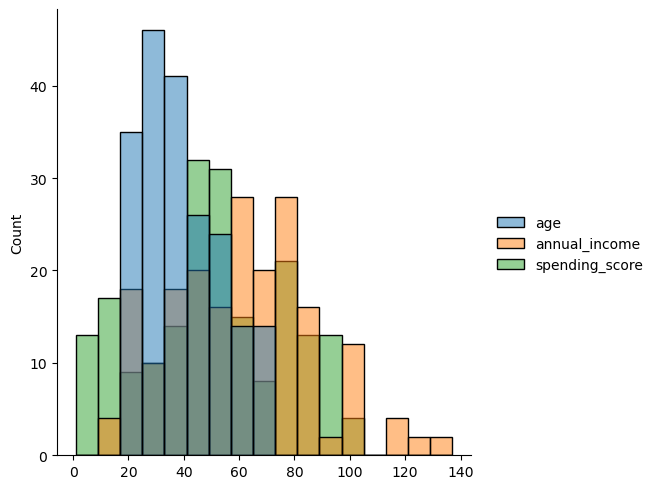

In [33]:
plt.figure(figsize=(10,7))
sns.pairplot(df[['age', 'annual_income', 'spending_score']])
sns.displot(df[['age', 'annual_income', 'spending_score']])

In [41]:
df['gender_std']=df['gender'].replace({'Female':0,'Male':1})
df['gender_std'].head(13)

C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_10576\355532198.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender_std']=df['gender'].replace({'Female':0,'Male':1})


0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    0
12    0
Name: gender_std, dtype: int64

In [42]:
df.head()


,customer_id,gender,age,annual_income,spending_score,gender_std
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [47]:
# Removing non numeric data
df = df.drop(['customer_id', 'gender'], axis=1)

KeyError: "['customer_id', 'gender'] not found in axis"

In [48]:
df.head()

,age,annual_income,spending_score,gender_std
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<Figure size 1000x700 with 0 Axes>

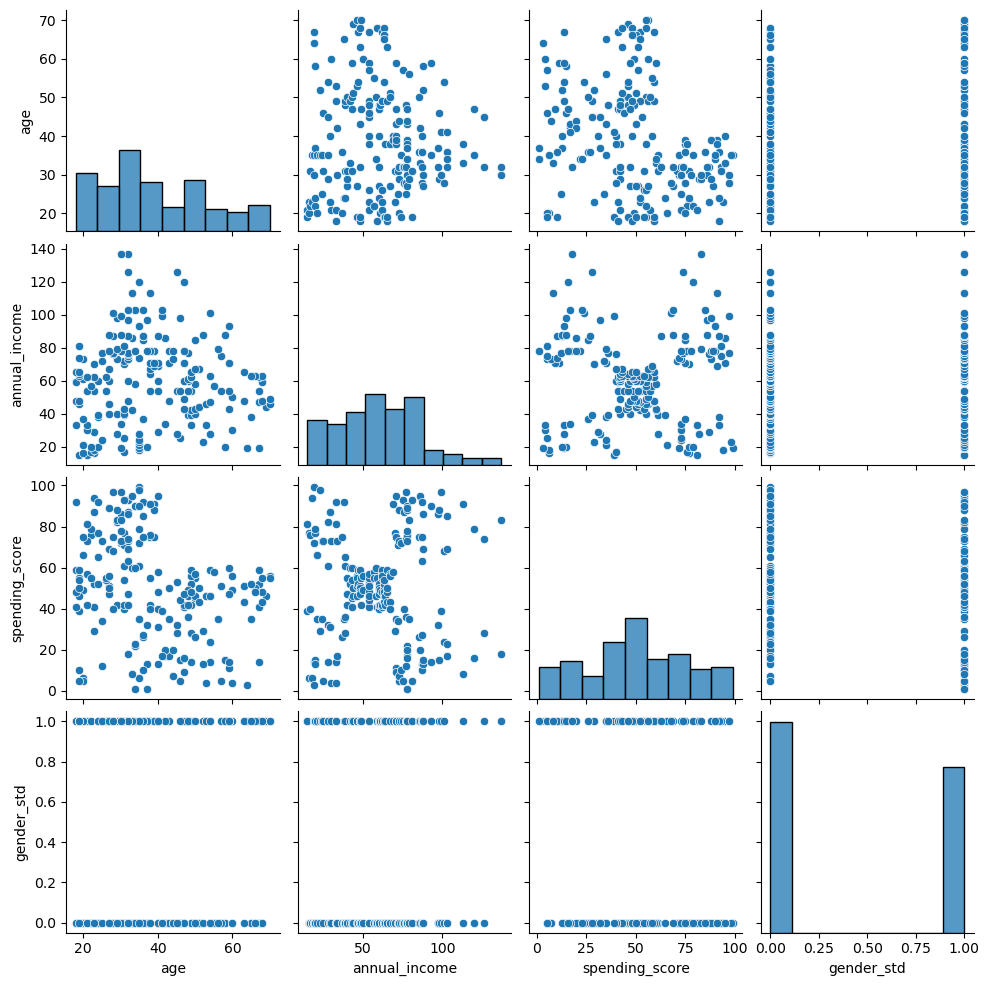

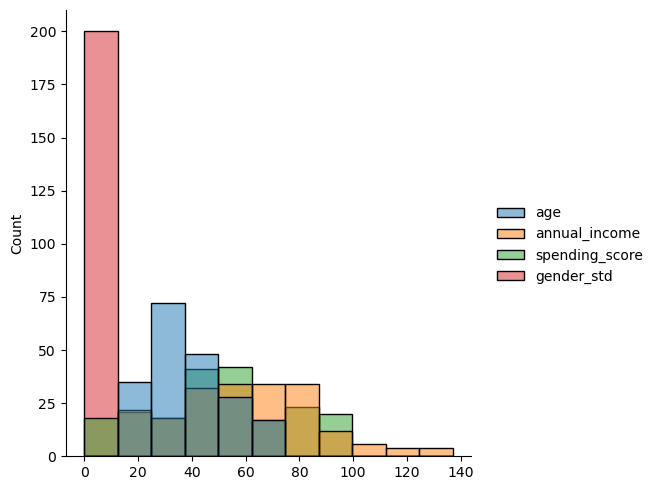

In [49]:
plt.figure(figsize=(10,7))
sns.pairplot(df[['age', 'annual_income', 'spending_score','gender_std']])
sns.displot(df[['age', 'annual_income', 'spending_score','gender_std']])

C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_10576\3390315666.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_income'])


Text(0, 0.5, 'Count')

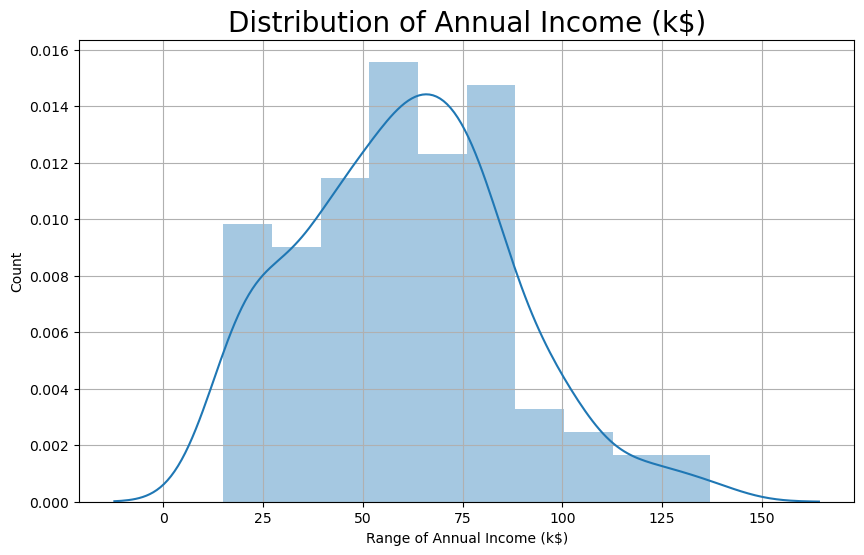

In [81]:
#annual_income distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['annual_income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.grid('True')
plt.ylabel('Count')

C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_10576\1177283167.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0, 0.5, 'Count')

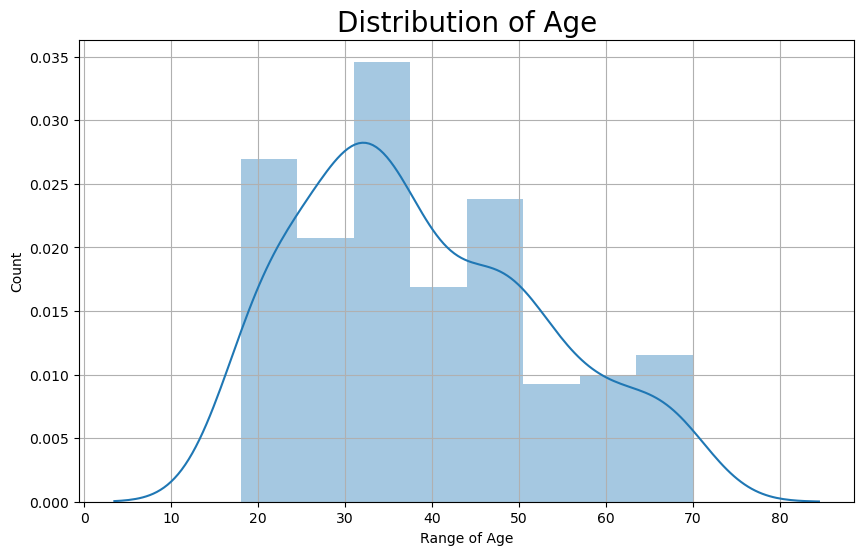

In [82]:
#age distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.grid('True')
plt.ylabel('Count')

C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_10576\901859075.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spending_score'])


Text(0, 0.5, 'Count')

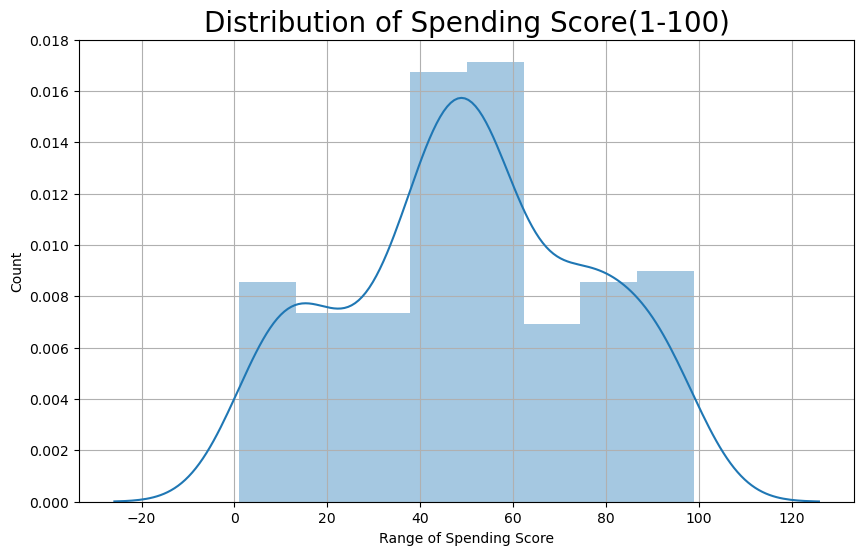

In [83]:
#spending_score distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['spending_score'])
plt.title('Distribution of Spending Score(1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.grid('True')
plt.ylabel('Count')

C:\Users\ANIRUDDHA CHAKRABORT\AppData\Local\Temp\ipykernel_10576\3991097769.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['gender_std'])


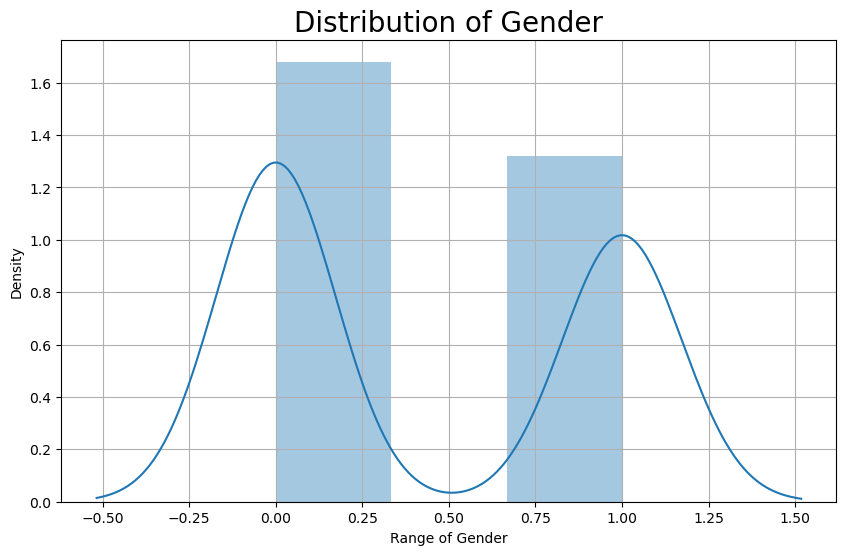

In [88]:
#gender distribution
plt.figure(figsize=(10, 6))
sns.distplot(df['gender_std'])
plt.title('Distribution of Gender', fontsize = 20)
plt.xlabel('Range of Gender')
plt.grid('True')


In [50]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [51]:
print(scaled_data)

[[-1.42456879 -1.73899919 -0.43480148  1.12815215]
 [-1.28103541 -1.73899919  1.19570407  1.12815215]
 [-1.3528021  -1.70082976 -1.71591298 -0.88640526]
 [-1.13750203 -1.70082976  1.04041783 -0.88640526]
 [-0.56336851 -1.66266033 -0.39597992 -0.88640526]
 [-1.20926872 -1.66266033  1.00159627 -0.88640526]
 [-0.27630176 -1.62449091 -1.71591298 -0.88640526]
 [-1.13750203 -1.62449091  1.70038436 -0.88640526]
 [ 1.80493225 -1.58632148 -1.83237767  1.12815215]
 [-0.6351352  -1.58632148  0.84631002 -0.88640526]
 [ 2.02023231 -1.58632148 -1.4053405   1.12815215]
 [-0.27630176 -1.58632148  1.89449216 -0.88640526]
 [ 1.37433211 -1.54815205 -1.36651894 -0.88640526]
 [-1.06573534 -1.54815205  1.04041783 -0.88640526]
 [-0.13276838 -1.54815205 -1.44416206  1.12815215]
 [-1.20926872 -1.54815205  1.11806095  1.12815215]
 [-0.27630176 -1.50998262 -0.59008772 -0.88640526]
 [-1.3528021  -1.50998262  0.61338066  1.12815215]
 [ 0.94373197 -1.43364376 -0.82301709  1.12815215]
 [-0.27630176 -1.43364376  1.85

c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

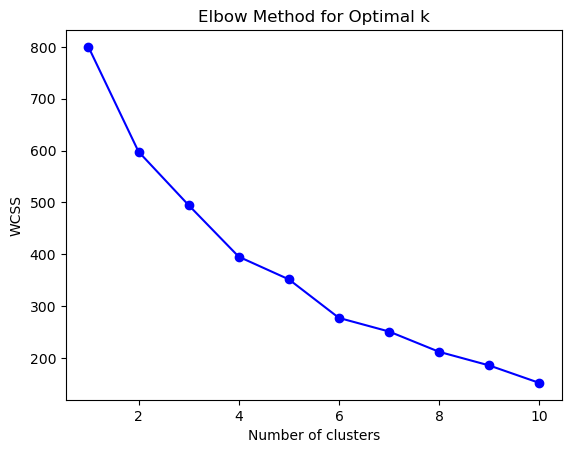

In [ ]:
# k-means model
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [77]:
# model with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df.head()


c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,age,annual_income,spending_score,gender_std,Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,3
3,23,16,77,0,3
4,31,17,40,0,3


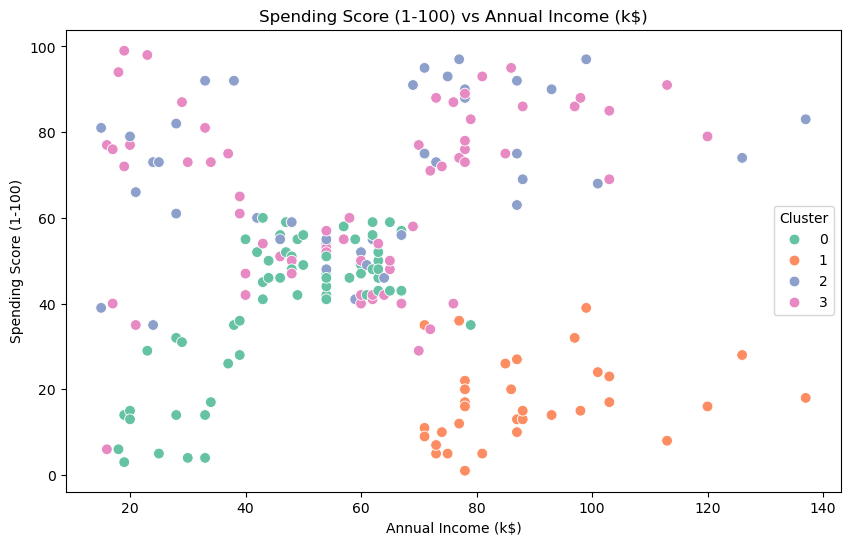

In [75]:
# plot of clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'annual_income',y = 'spending_score',hue="Cluster",  
                 palette='Set2', legend='full',data = df,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()




c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

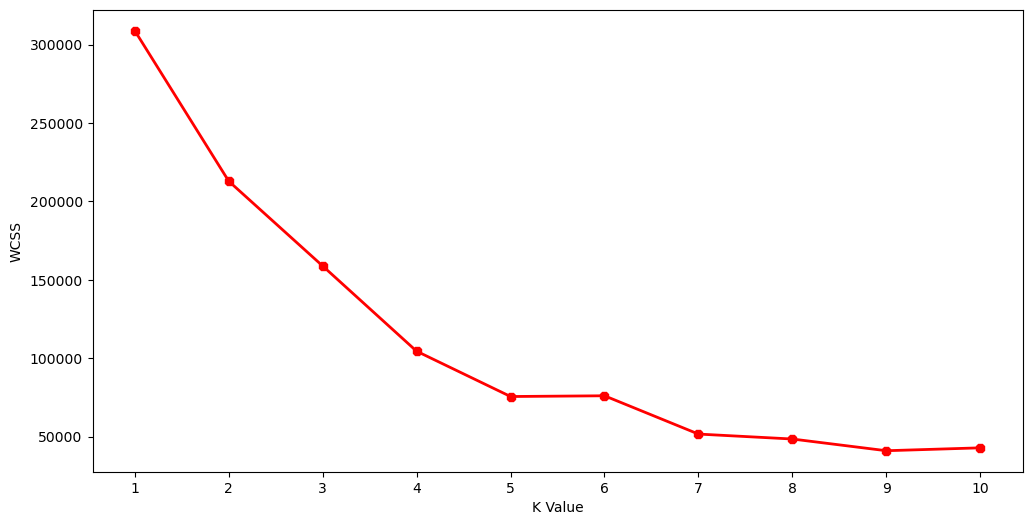

In [90]:
#Taking the features
X=df[["age","annual_income","spending_score","gender_std"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [94]:
#We choose the k for which WSS starts to diminish
kmeans2= KMeans(n_clusters=5)
y= kmeans2.fit_predict(X)
df['lables'] = kmeans2.fit_predict(scaled_data)

c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ANIRUDDHA CHAKRABORT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


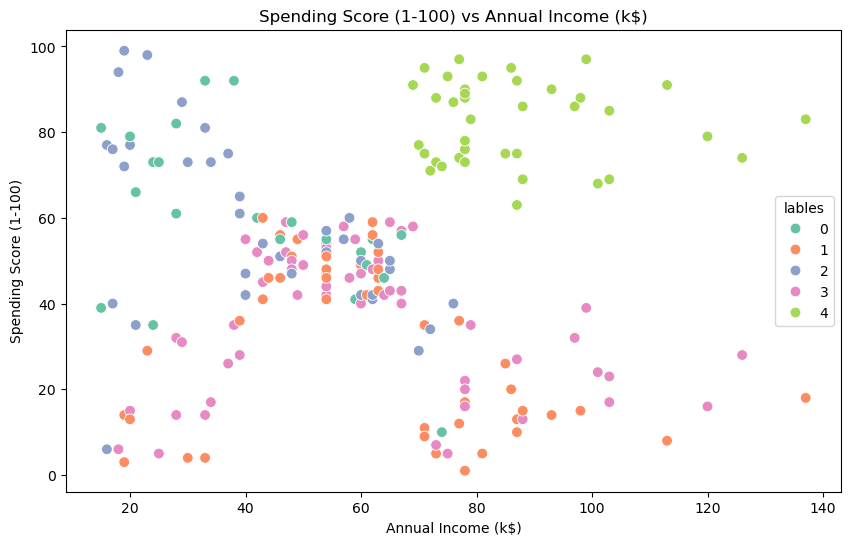

In [96]:
# plot of clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'annual_income',y = 'spending_score',hue="lables",  
                 palette='Set2', legend='full',data = df,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [107]:
#number of customer in clusters
cust1=df[df['lables']==0]
print('Number of customer in 1st group=', len(cust1))
print("--------------------------------------------")
cust2=df[df['lables']==1]
print('Number of customer in 2nd group=', len(cust2))
print("--------------------------------------------")
cust3=df[df['lables']==2]
print('Number of customer in 3rd group=', len(cust3))
print("--------------------------------------------")
cust4=df[df['lables']==3]
print('Number of customer in 4th group=', len(cust4))
print("--------------------------------------------")
cust5=df[df['lables']==4]
print('Number of customer in 5th group=', len(cust5))
print("--------------------------------------------")

print('Total:',df['lables'].count())



Number of customer in 1st group= 24
--------------------------------------------
Number of customer in 2nd group= 46
--------------------------------------------
Number of customer in 3rd group= 37
--------------------------------------------
Number of customer in 4th group= 54
--------------------------------------------
Number of customer in 5th group= 39
--------------------------------------------
Total: 200
